**Author :** Rutendo F. Sigauke

**Input  :** 
1. Overlap count files for both significant and non-significant eQTLs 

**Output :**

OR Figure 

# Load libraries

In [1]:
library(docstring) ##documentation of R functions
library(ggplot2) ##pretty plots in R
library(cowplot) ##easy pretty ggplot figures
library(extrafont) ##fonts for plots
library(data.table) ##fast load of tables
library(epitools) ##OR calculation


Attaching package: ‘docstring’


The following object is masked from ‘package:utils’:

    ?


Registering fonts with R



# Overlap with GTEx eQTLs

## Odds ratio of significant GTEx eQTL variants compared to non-significant variants

In [2]:
gtex_odds_folder <- '/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect'

##get paths for the tables
gtex_odds_files <- list.files(path=gtex_odds_folder, 
                              pattern="*.txt",
                             full.names=TRUE)
length(gtex_odds_files)
gtex_odds_files

[1] 49

[1] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Adipose_Subcutaneous_count_overlaps.txt"                 
 [2] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Adipose_Visceral_Omentum_count_overlaps.txt"             
 [3] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Adrenal_Gland_count_overlaps.txt"                        
 [4] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Artery_Aorta_count_overlaps.txt"                         
 [5] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Artery_Coronary_count_overlaps.txt"                      
 [6] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Artery_Tibial_count_overlaps.txt"                        
 [7] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Brain_Amygdala_count_overlaps.txt"                       
 [8] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Brain_Anterior_cingulate_cortex_BA24_count_overlaps.txt" 
 [9] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Brain_Caudate_basal_ganglia_count_overlaps.txt"          
[10] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Brain_Cerebellar_Hemisphere_count_overlaps.txt"          
[11] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Brain_Cerebellum_count_overlaps.txt"                     
[12] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Brain_Cortex_count_overlaps.txt"                         
[13] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Brain_Frontal_Cortex_BA9_count_overlaps.txt"             
[14] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Brain_Hippocampus_count_overlaps.txt"                    
[15] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Brain_Hypothalamus_count_overlaps.txt"                   
[16] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Brain_Nucleus_accumbens_basal_ganglia_count_overlaps.txt"
[17] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Brain_Putamen_basal_ganglia_count_overlaps.txt"          
[18] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Brain_Spinal_cord_cervical_c-1_count_overlaps.txt"       
[19] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Brain_Substantia_nigra_count_overlaps.txt"               
[20] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Breast_Mammary_Tissue_count_overlaps.txt"                
[21] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Cells_Cultured_fibroblasts_count_overlaps.txt"           
[22] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Cells_EBV-transformed_lymphocytes_count_overlaps.txt"    
[23] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Colon_Sigmoid_count_overlaps.txt"                        
[24] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Colon_Transverse_count_overlaps.txt"                     
[25] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Esophagus_Gastroesophageal_Junction_count_overlaps.txt"  
[26] "/Users/rusi2317/projects/meta_analysis_qc/hg3

In [3]:
##get tissue names
gtex_file_names <- tools::file_path_sans_ext(basename(gtex_odds_files))
tissue_names <- as.character(lapply(strsplit(gtex_file_names, '\\.'), `[`, 1))
tissue_names_nodash <- gsub('_count_overlaps', '', tissue_names )
tissue_names_final <- gsub('_',' ', tissue_names_nodash)
tissue_names_final

[1] "Adipose Subcutaneous"                 
 [2] "Adipose Visceral Omentum"             
 [3] "Adrenal Gland"                        
 [4] "Artery Aorta"                         
 [5] "Artery Coronary"                      
 [6] "Artery Tibial"                        
 [7] "Brain Amygdala"                       
 [8] "Brain Anterior cingulate cortex BA24" 
 [9] "Brain Caudate basal ganglia"          
[10] "Brain Cerebellar Hemisphere"          
[11] "Brain Cerebellum"                     
[12] "Brain Cortex"                         
[13] "Brain Frontal Cortex BA9"             
[14] "Brain Hippocampus"                    
[15] "Brain Hypothalamus"                   
[16] "Brain Nucleus accumbens basal ganglia"
[17] "Brain Putamen basal ganglia"          
[18] "Brain Spinal cord cervical c-1"       
[19] "Brain Substantia nigra"               
[20] "Breast Mammary Tissue"                
[21] "Cells Cultured fibroblasts"           
[22] "Cells EBV-transformed lymphocytes"    
[23] "Colon Sigmoid"                        
[24] "Colon Transverse"                     
[25] "Esophagus Gastroesophageal Junction"  
[26] "Esophagus Mucosa"                     
[27] "Esophagus Muscularis"                 
[28] "Heart Atrial Appendage"               
[29] "Heart Left Ventricle"                 
[30] "Kidney Cortex"                        
[31] "Liver"                                
[32] "Lung"                                 
[33] "Minor Salivary Gland"                 
[34] "Muscle Skeletal"                      
[35] "Nerve Tibial"                         
[36] "Ovary"                                
[37] "Pancreas"                             
[38] "Pituitary"                            
[39] "Prostate"                             
[40] "Skin Not Sun Exposed Suprapubic"      
[41] "Skin Sun Exposed Lower leg"           
[42] "Small Intestine Terminal Ileum"       
[43] "Spleen"                               
[44] "Stomach"                              
[45] "Testis"                               
[46] "Thyroid"                              
[47] "Uterus"                               
[48] "Vagina"                               
[49] "Whole Blood"

In [4]:
##load all tables with overlap counts
gtex_file_DT_list <- lapply(gtex_odds_files, 
                    data.table::fread, header=F)

##add tissue ids to tables
gtex_file_DT_tissues_list <- list()

for (i in 1:length(gtex_file_DT_list)){
    
    tissue_gtex <- gtex_file_DT_list[[i]]
    tissue_gtex$tissue <- tissue_names_final[[i]]
    gtex_file_DT_tissues_list[[i]] <- tissue_gtex
}

In [5]:
gtex_file_DT_tissues_list[[1]]

V1,V2,tissue
<chr>,<chr>,<chr>
eqtl_bidir,278861 /scratch/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Adipose_Subcutaneous_SIGeqtl_bidirs.bed,Adipose Subcutaneous
eqtl_NObidir,1223752 /scratch/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Adipose_Subcutaneous_SIGeqtl_NObidirs.bed,Adipose Subcutaneous
NONeqtl_bidir,1168100 /scratch/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Adipose_Subcutaneous_NONSIGeqtl_bidirs.bed,Adipose Subcutaneous
NONeqtl_NObidir,7620312 /scratch/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/Adipose_Subcutaneous_NONSIGeqtl_NObidirs.bed,Adipose Subcutaneous


In [6]:
##initiate lists
odds_ratio_tissues <- list()
odds_ratio_waldp <- list()
odds_ratio_lower <- list()
odds_ratio_upper <- list()

for (i in 1:length(gtex_file_DT_tissues_list)){
    
    cc_dt <- gtex_file_DT_tissues_list[[i]]
    print(unique(cc_dt$tissue))
    print(as.numeric(sapply(strsplit(cc_dt$V2," "),
                                   `[`, 1)))
    ##get matrix of counts
    cc <- matrix(as.numeric(sapply(strsplit(cc_dt$V2," "),
                                   `[`, 1)),
                 nr=2, nc=2, 
                 byrow=FALSE) 
    colnames(cc) <- c("Sig_eQTL","NonSig_eQTL")
    rownames(cc) <- c("Bidir", "NoBidir")

    ##calculate odds ratio
    cc_odds <- oddsratio.wald(cc)
    print(cc_odds)
    
    ##save OR and p-values to lists
    odds_ratio_tissues[[i]] <- cc_odds$measure[2,1]
    odds_ratio_waldp[[i]] <- cc_odds$p.value[2,1]
    odds_ratio_lower[[i]] <- cc_odds$measure[2,2]
    odds_ratio_upper[[i]] <- cc_odds$measure[2,3]
    
}

[1] "Adipose Subcutaneous"
[1]  278861 1223752 1168100 7620312
$data
        Sig_eQTL NonSig_eQTL    Total
Bidir     278861     1168100  1446961
NoBidir  1223752     7620312  8844064
Total    1502613     8788412 10291025

$measure
                        NA
odds ratio with 95% C.I. estimate    lower    upper
                 Bidir   1.000000       NA       NA
                 NoBidir 1.486576 1.479827 1.493356

$p.value
         NA
two-sided midp.exact fisher.exact chi.square
  Bidir           NA           NA         NA
  NoBidir          0            0          0

$correction
[1] FALSE

attr(,"method")
[1] "Unconditional MLE & normal approximation (Wald) CI"
[1] "Adipose Visceral Omentum"
[1]  210678  906956 1236989 7959137
$data
        Sig_eQTL NonSig_eQTL    Total
Bidir     210678     1236989  1447667
NoBidir   906956     7959137  8866093
Total    1117634     9196126 10313760

$measure
                        NA
odds ratio with 95% C.I. estimate    lower    upper
                 B

In [7]:
##create dataframe with OR statistics
odds_ratio_summary <- as.data.frame(t(as.data.frame(odds_ratio_tissues)))
colnames(odds_ratio_summary) <- 'odds_ratio'
odds_ratio_summary$odds_ratio_lower <- as.numeric(odds_ratio_lower)
odds_ratio_summary$odds_ratio_upper <- as.numeric(odds_ratio_upper)
odds_ratio_summary$odds_ratio_waldp <- as.numeric(odds_ratio_waldp)
odds_ratio_summary$tissue <- tissue_names_final
odds_ratio_summary

,odds_ratio,odds_ratio_lower,odds_ratio_upper,odds_ratio_waldp,tissue
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
X1.4865759245278,1.486576,1.479827,1.493356,0,Adipose Subcutaneous
X1.49462799057571,1.494628,1.487018,1.502277,0,Adipose Visceral Omentum
X1.48278041117328,1.482780,1.472935,1.492692,0,Adrenal Gland
X1.47859312848176,1.478593,1.471105,1.486119,0,Artery Aorta
X1.47999837307516,1.479998,1.468938,1.491142,0,Artery Coronary
X1.4809259022953,1.480926,1.474243,1.487639,0,Artery Tibial
X1.4675276017491,1.467528,1.452473,1.482739,0,Brain Amygdala
X1.46663494045504,1.466635,1.454197,1.479180,0,Brain Anterior cingulate cortex BA24
X1.47778538308023,1.477785,1.467841,1.487797,0,Brain Caudate basal ganglia


## Plot OR for GTEx tissues

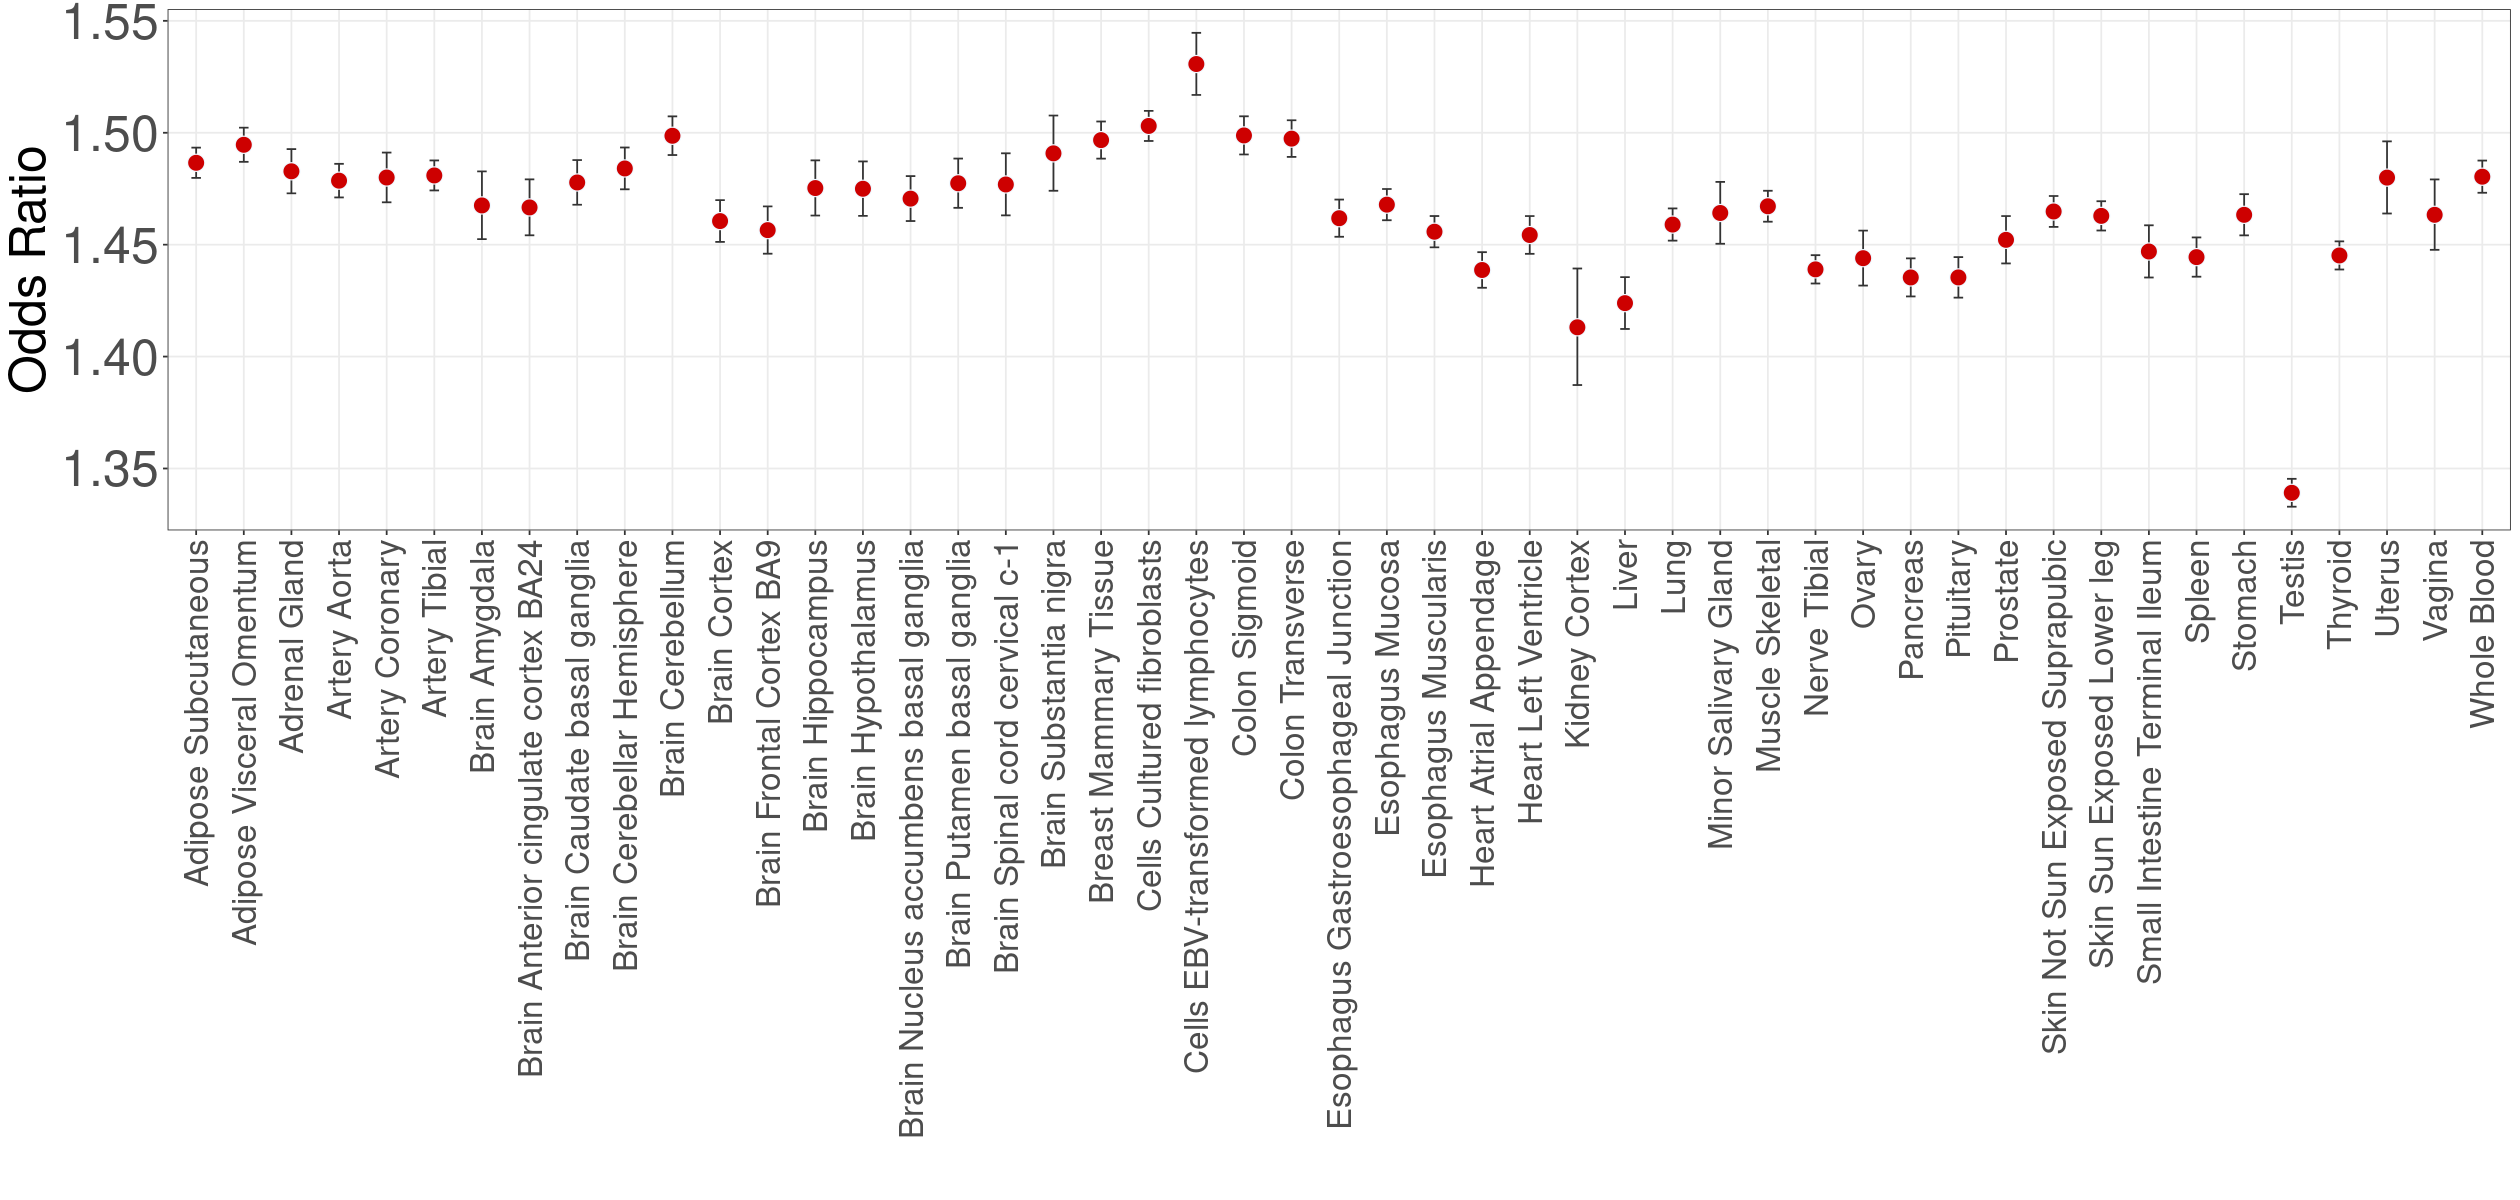

In [8]:
options(repr.plot.width=21, repr.plot.height=10)
plot_odds_flip <- ggplot(odds_ratio_summary, aes(x = odds_ratio, y = tissue)) + 
    geom_errorbarh(aes(xmax = odds_ratio_upper,
                       xmin = odds_ratio_lower), size = 0.5, height = 
                    0.2, color = "gray20") +
    geom_point(size = 4.5, fill = "red3", shape=21, color='aliceblue') + #gray80
    coord_flip() +
    theme_bw()+
    theme(panel.grid.minor = element_blank()) +
    ylab("") +
    xlab("Odds Ratio") +
    theme(plot.title = element_text(hjust = 0.5),
          title = element_text(size = 30), 
          axis.title = element_text(size = 30), 
          axis.text.x = element_text(size = 20, 
                                     angle = 90, 
                                     vjust = 0.5, 
                                     hjust = 1),
          axis.text.y = element_text(size = 30),
          legend.title = element_text(size = 28)) 

plot_odds_flip

In [9]:
ggsave(plot_odds_flip, width = 21, height = 10,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/hg38_bidir_gtex_odds_ratio.pdf", 
       bg = "transparent")

ggsave(plot_odds_flip, width = 21, height = 10,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/hg38_bidir_gtex_odds_ratio.png", 
       bg = "transparent")

# Session Information

In [16]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] epitools_0.5-10.1 data.table_1.14.2 extrafont_0.18    cowplot_1.1.1    
[5] ggplot2_3.3.6     docstring_1.0.0  

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-7      tidyselect_1.1.2  xfun_0.32         repr_1.1.4       
 [5] purrr_0.3.4       colorspace_2.0-3  vctrs_0.5.0       generics_0.1.3   
 [9] htmltools_0.5.2 